In [1]:
import pandas as pd
import os


In [2]:
movie_rating = pd.read_csv("C:\\Users\\akhil\\OneDrive\\Desktop\\PythonT\\Movie-Ratings.csv")

In [3]:
movie_rating.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rotten Tomatoes Ratings %,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
Audience Ratings %,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
Budget (million $),559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0
Year of release,559.0,2009.152057,1.362632,2007.0,2008.0,2009.0,2010.0,2011.0


In [4]:
movie_rating.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [5]:
movie_rating.columns = ['Film','Genre','CriticRating','AudienceRating','Budget','Year']

In [6]:
movie_rating.columns

Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'Budget', 'Year'], dtype='object')

In [7]:
movie_rating.Film = movie_rating.Film.astype('category')


In [8]:
movie_rating.Genre = movie_rating.Genre.astype('category')
movie_rating.Year = movie_rating.Year.astype('category')


In [9]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   Budget          559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,8

In [11]:
##JointPlots

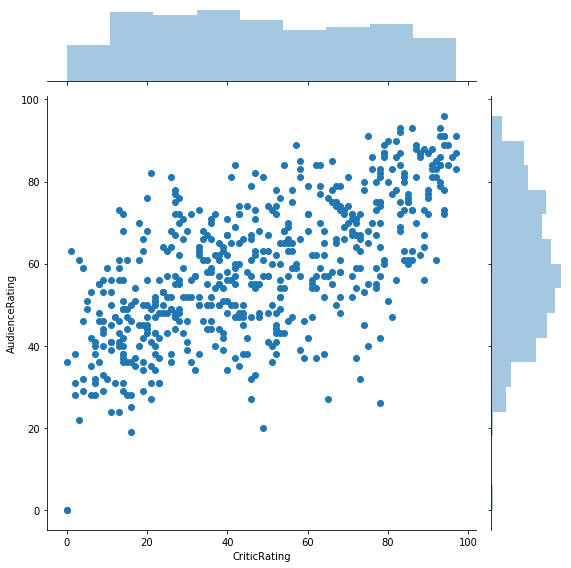

In [12]:
j = sns.jointplot( data = movie_rating, x = 'CriticRating', y = 'AudienceRating' , height = 8)

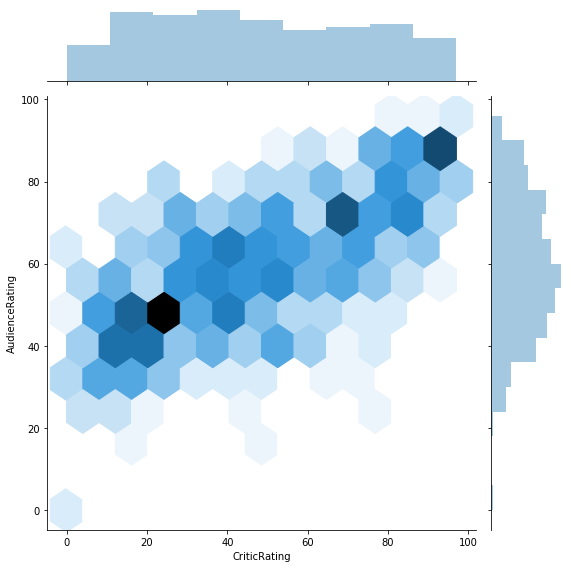

In [13]:
j2 = sns.jointplot( data = movie_rating, x = 'CriticRating', y = 'AudienceRating' , height = 8, kind = 'hex')

---

In [14]:
#Histograms

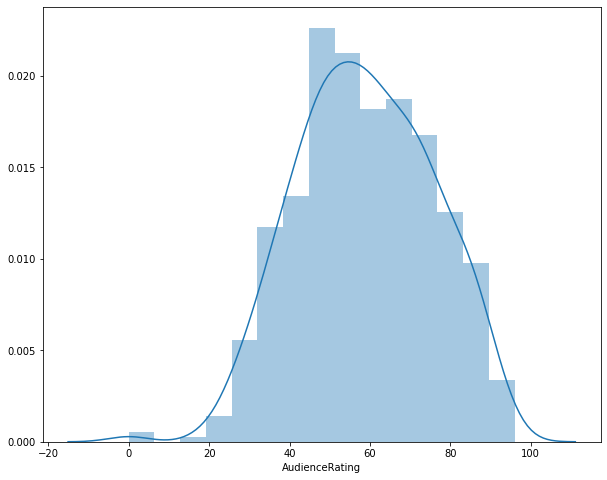

In [15]:
m1 = sns.distplot(movie_rating.AudienceRating, bins= 15)

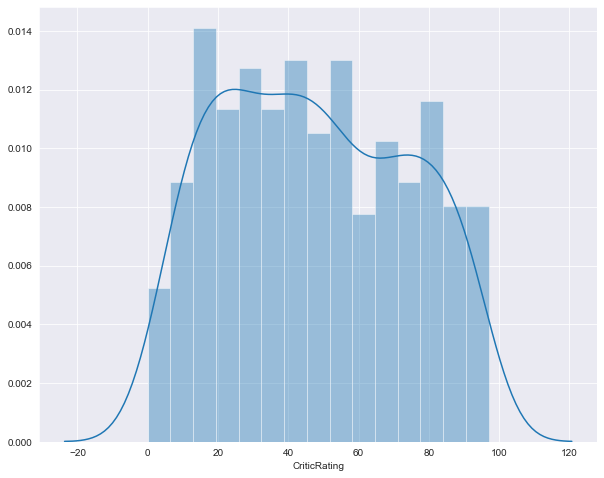

In [16]:
sns.set_style("darkgrid")
m2 = sns.distplot(movie_rating.CriticRating, bins= 15)

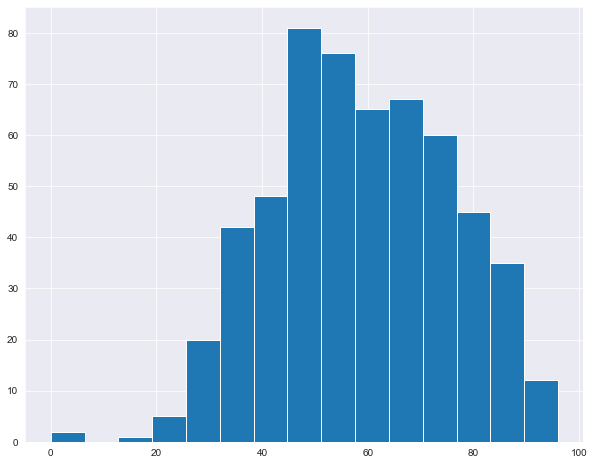

In [17]:
n1 = plt.hist(movie_rating.AudienceRating, bins= 15)

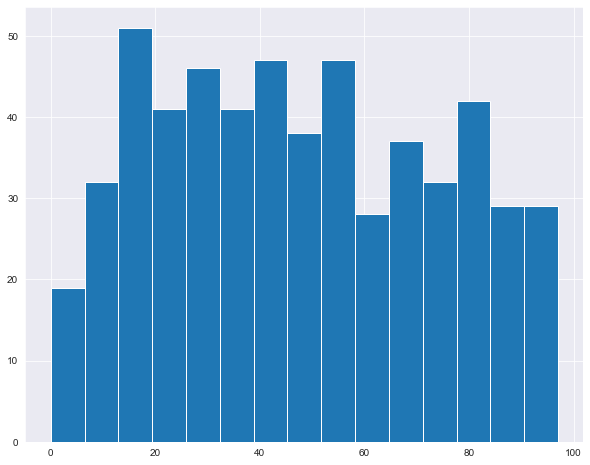

In [18]:
n2 = plt.hist(movie_rating.CriticRating, bins= 15)

---

In [19]:
#Stacked Histogram

In [20]:
movie_rating[movie_rating.Genre == 'Action'].Budget

2       20
5      200
15      35
29      20
30      20
      ... 
531    130
542     35
546    150
547    160
557     24
Name: Budget, Length: 154, dtype: int64

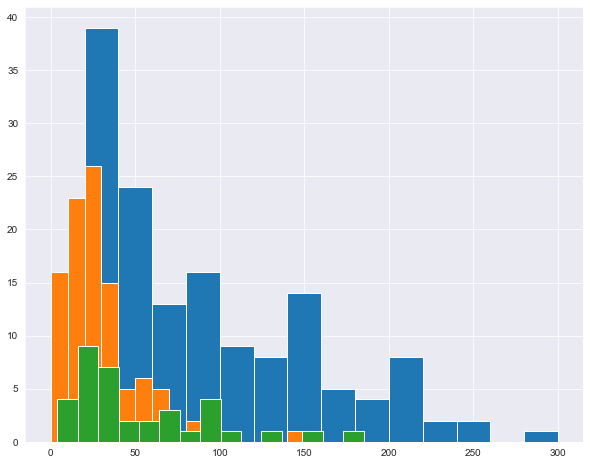

In [21]:
plt.hist(movie_rating[movie_rating.Genre == 'Action'].Budget, bins=15)
plt.hist(movie_rating[movie_rating.Genre == 'Drama'].Budget, bins=15)
plt.hist(movie_rating[movie_rating.Genre == 'Thriller'].Budget, bins=15)
#plt.hist(movie_rating[movie_rating.Genre == 'Comedy'].Budget, bins=15)
plt.show()

In [22]:
movie_rating.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

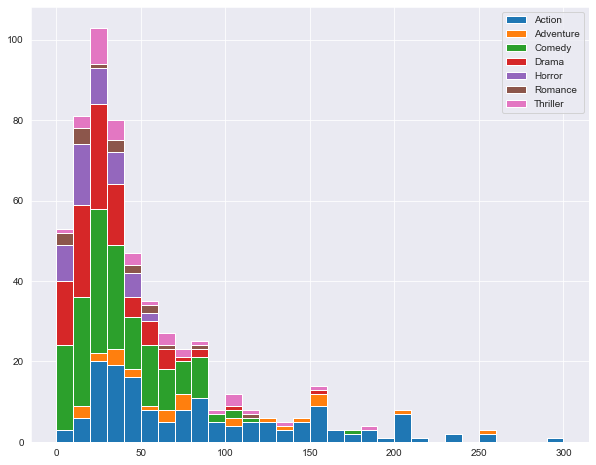

In [23]:
genre_list = []
mylable = []
for gen in movie_rating.Genre.cat.categories:
    genre_list.append(movie_rating[movie_rating.Genre == gen].Budget)
    mylable.append(gen)
#genre_list
plt.hist(genre_list, bins=30, stacked = True, rwidth = 1 , label = mylable)
plt.legend()
plt.show()

---

In [24]:
#KDE

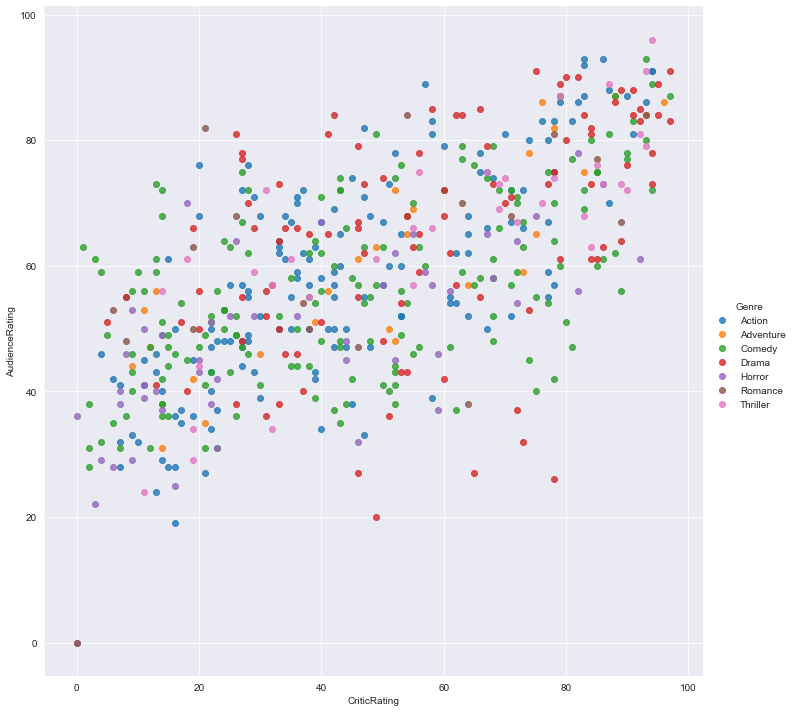

In [25]:
vis1 = sns.lmplot( data = movie_rating, x = 'CriticRating', y = "AudienceRating", height = 10, 
                 aspect = 1,
                 fit_reg=False, 
                 hue = 'Genre')

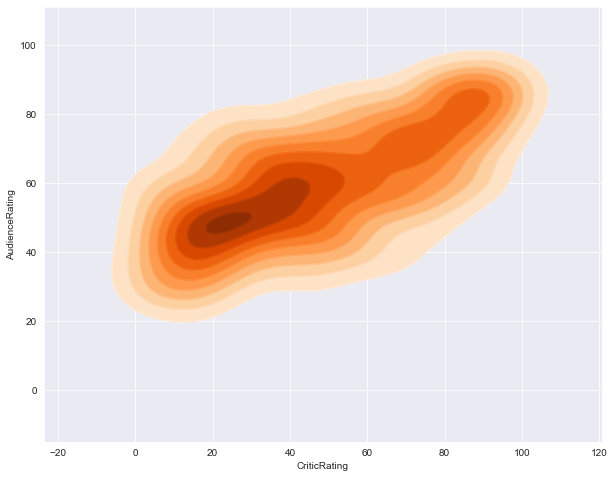

In [26]:
k1 = sns.kdeplot(movie_rating.CriticRating, movie_rating.AudienceRating , shade = True, shade_lowest=False,cmap = 'Oranges')

##Adds more outline
K1b = sns.kdeplot(movie_rating.CriticRating, movie_rating.AudienceRating , cmap = 'Oranges')

---

In [27]:
###SubPlots

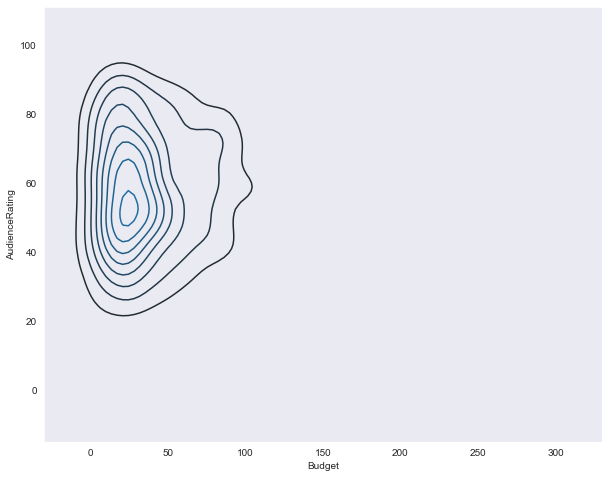

In [28]:
sns.set_style("dark")
k1 = sns.kdeplot(movie_rating.Budget,movie_rating.AudienceRating)

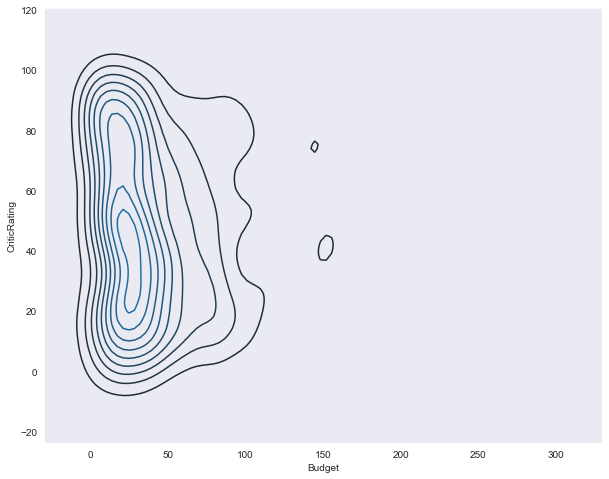

In [29]:
k2 = sns.kdeplot(movie_rating.Budget,movie_rating.CriticRating)

[(-20, 160)]

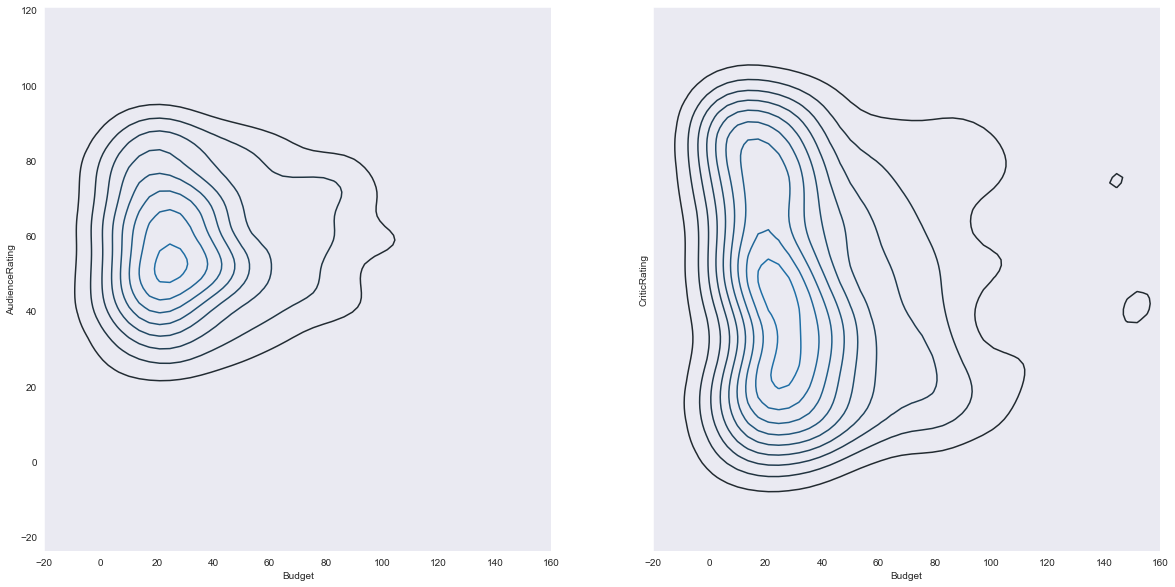

In [30]:
x , axes = plt.subplots(1,2,figsize = (20, 10), sharex= True, sharey = True)
k1 = sns.kdeplot(movie_rating.Budget,movie_rating.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movie_rating.Budget,movie_rating.CriticRating, ax=axes[1])
k1.set(xlim = (-20,160))

---

In [31]:
#VioletPlots

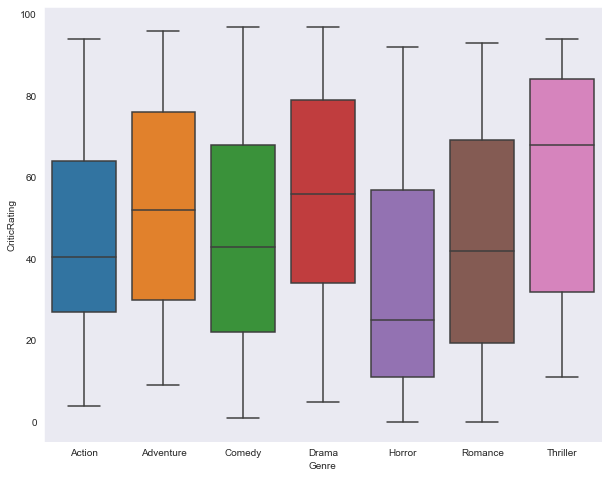

In [32]:
z1 = sns.boxplot( data = movie_rating, x = 'Genre', y = 'CriticRating')

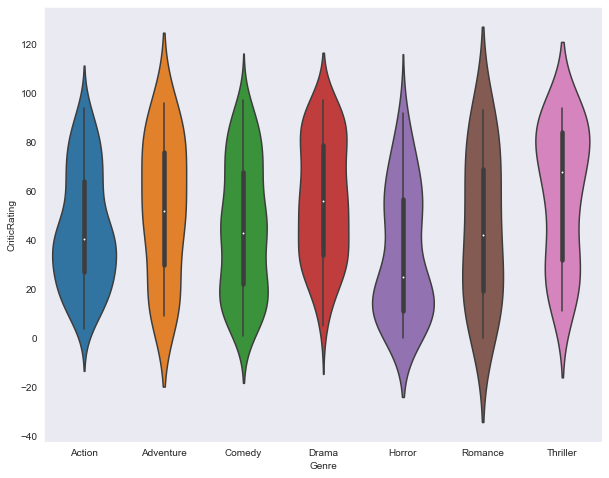

In [33]:
z2 = sns.violinplot( data = movie_rating, x = 'Genre', y = 'CriticRating')

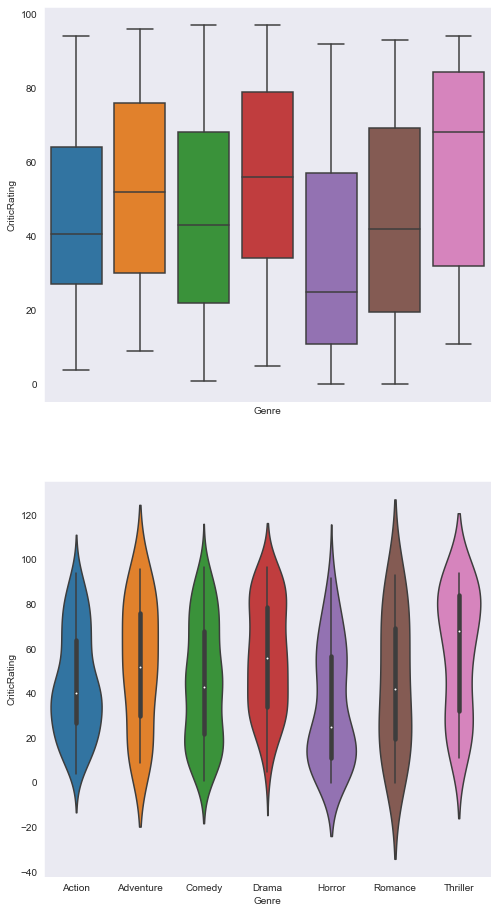

In [34]:
z , axes = plt.subplots( 2, 1, figsize = (8,16) , sharex = True)
z1 = sns.boxplot( data = movie_rating, x = 'Genre', y = 'CriticRating', ax= axes[0])
z2 = sns.violinplot( data = movie_rating, x = 'Genre', y = 'CriticRating', ax=axes[1])

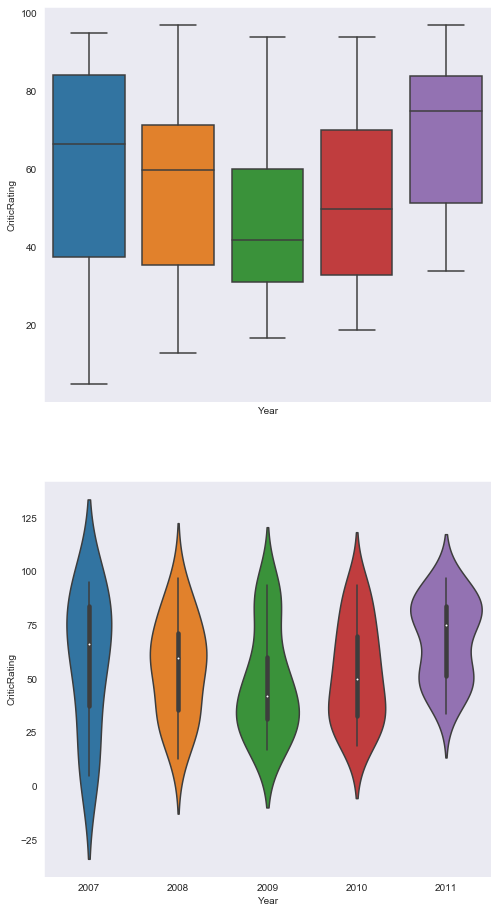

In [35]:
rz , axes = plt.subplots( 2, 1, figsize = (8,16) , sharex = True)
rz1 = sns.boxplot( data = movie_rating[movie_rating.Genre == 'Drama'], x = 'Year', y = 'CriticRating', ax= axes[0])
rz2 = sns.violinplot( data = movie_rating[movie_rating.Genre == 'Drama'], x = 'Year', y = 'CriticRating', ax=axes[1])

---

In [36]:
##FacetGrid

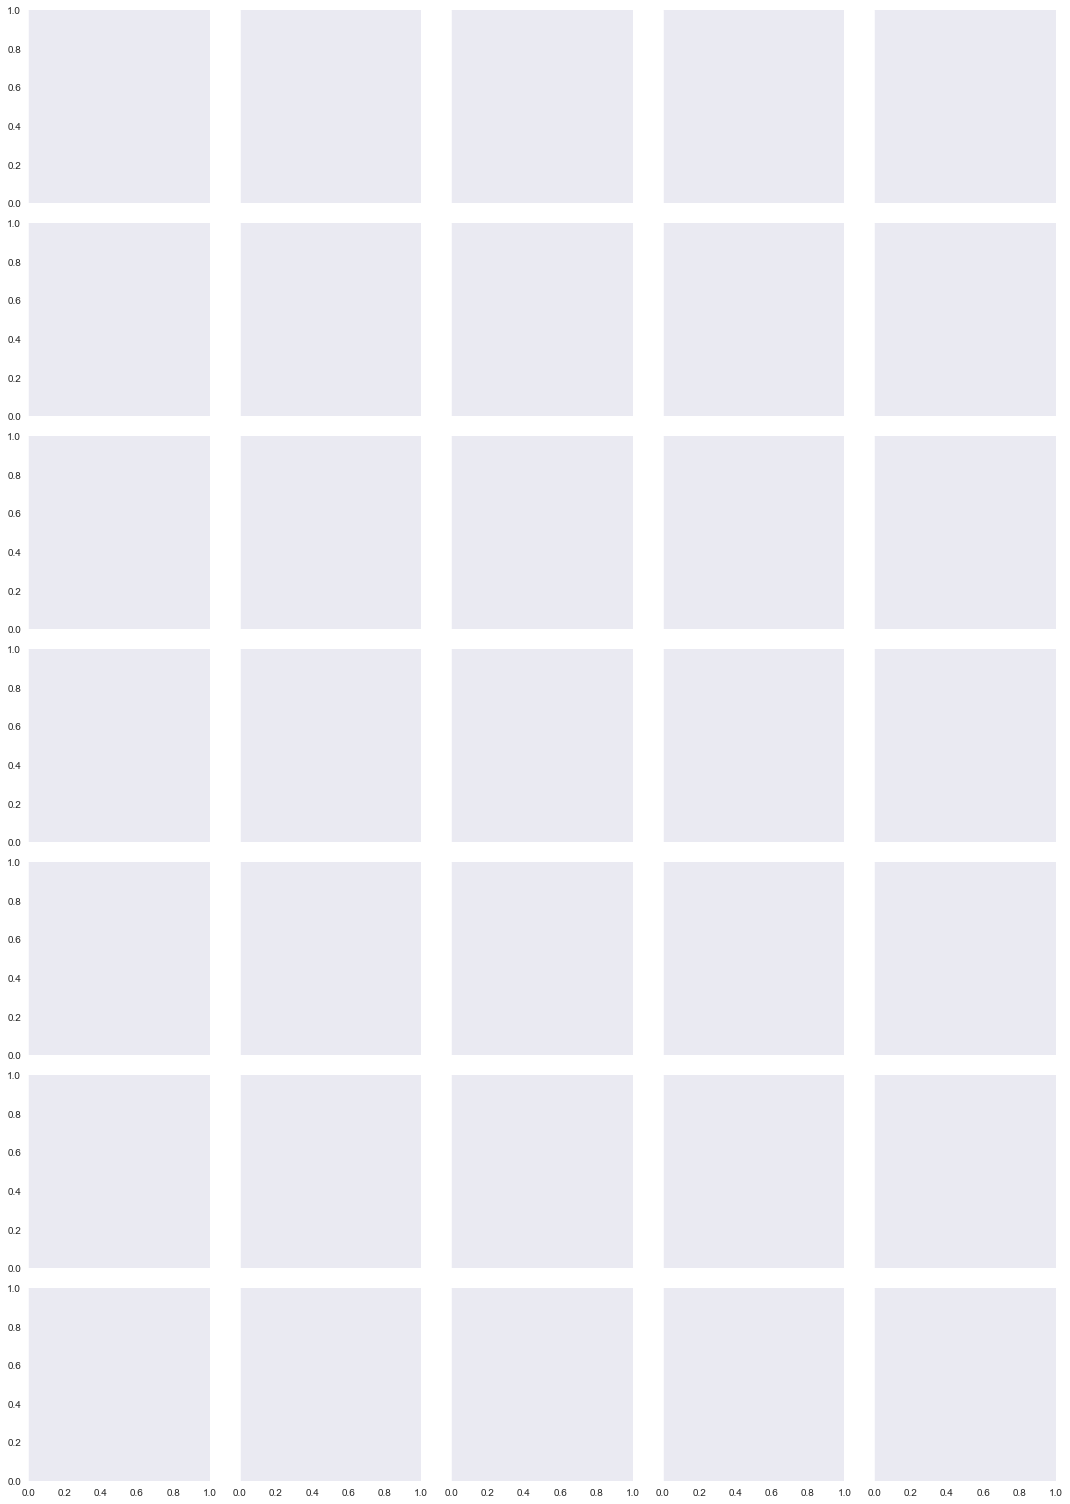

In [37]:
g = sns.FacetGrid(data = movie_rating , row = 'Genre', col= 'Year', hue = 'Genre')

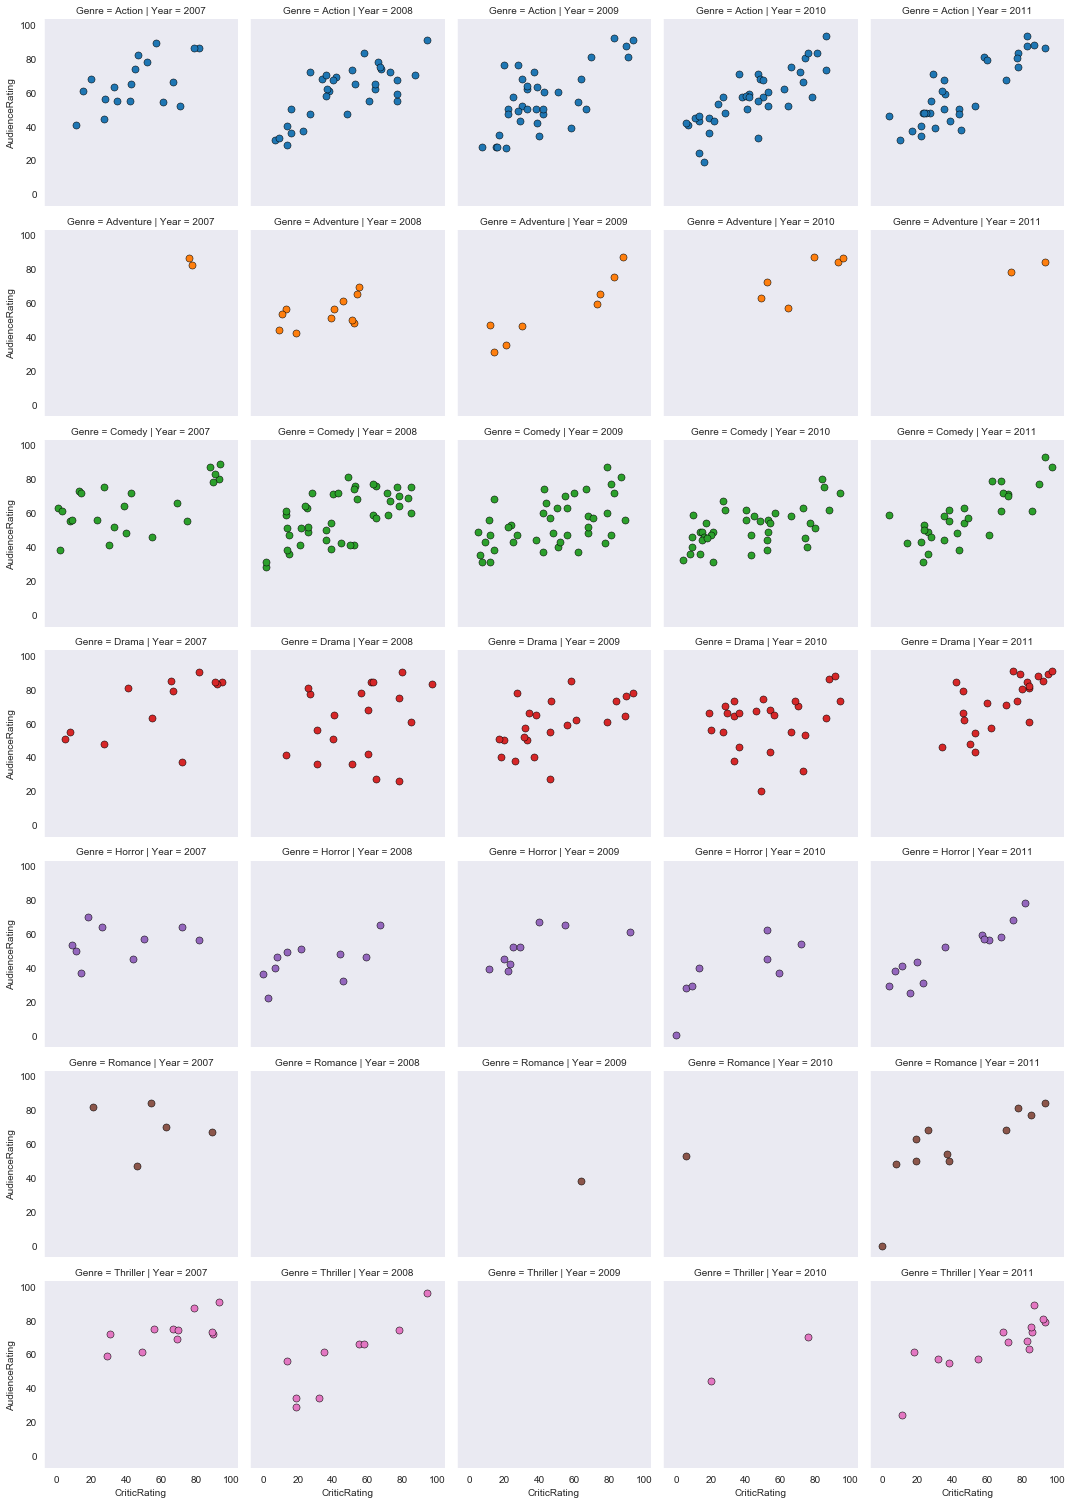

In [38]:
g = sns.FacetGrid(data = movie_rating , row = 'Genre', col= 'Year', hue = 'Genre')
lws = {'s' : 50, 'linewidth': 0.5, 'edgecolor': 'black'}
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **lws)

---

In [39]:
#Diagnols

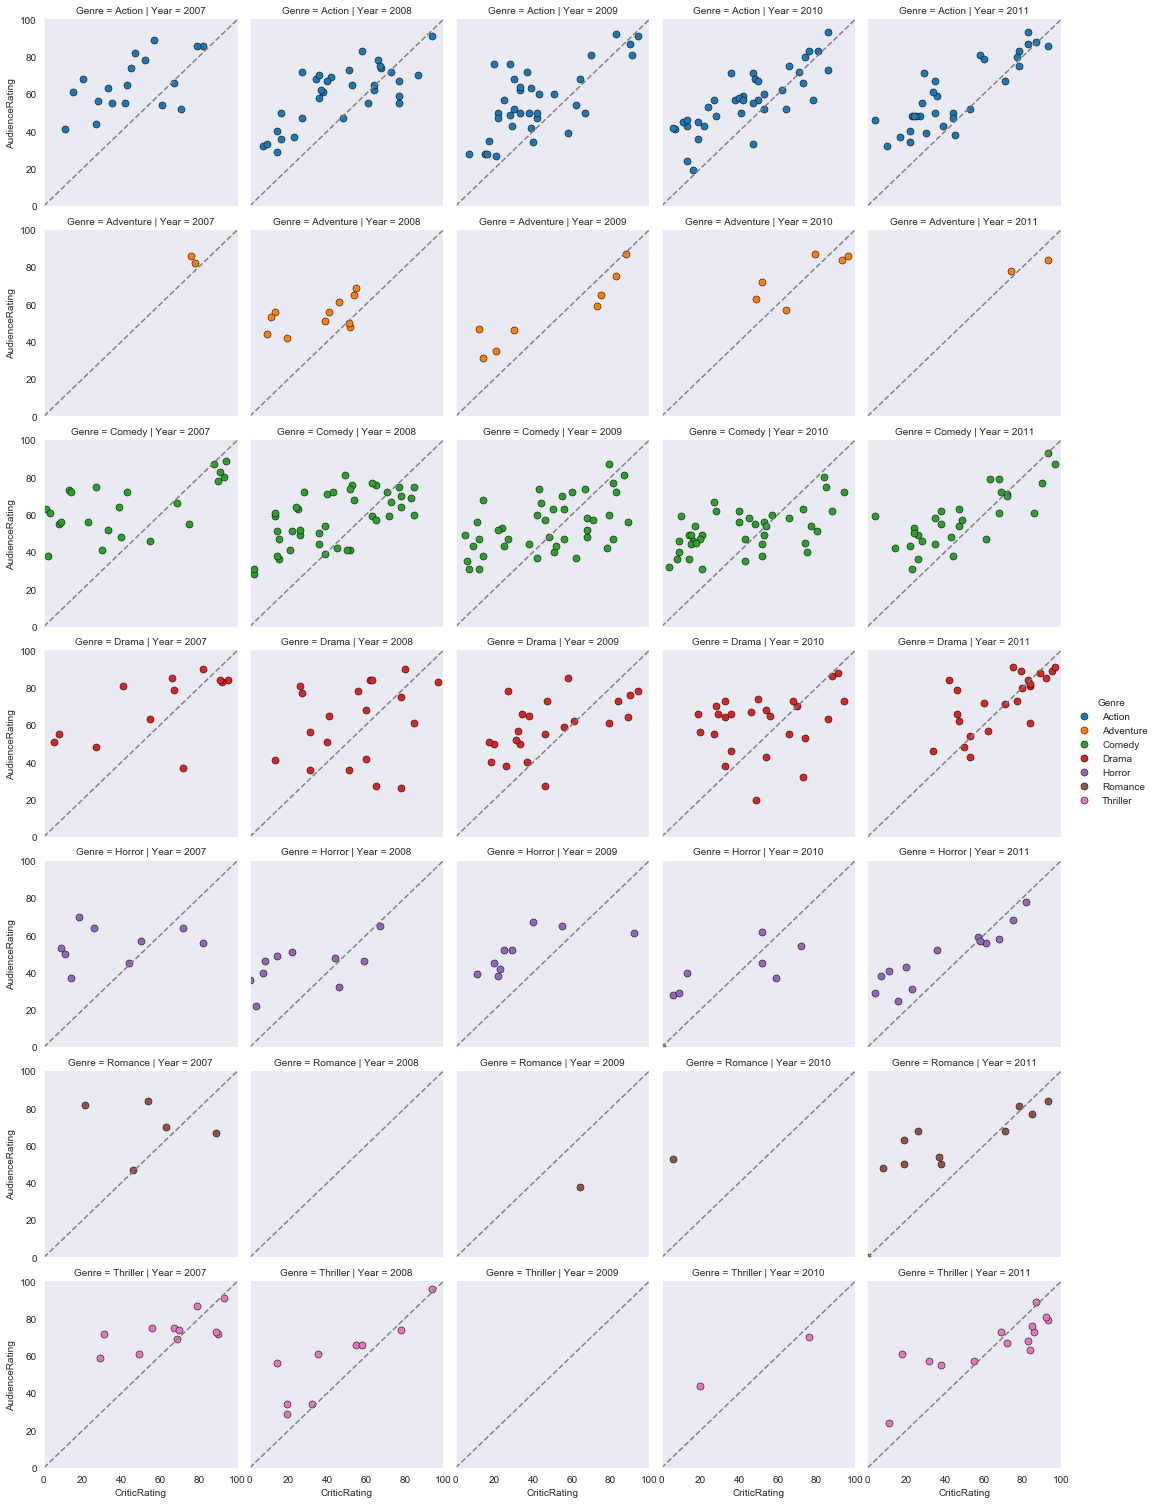

In [42]:
g = sns.FacetGrid(data = movie_rating , row = 'Genre', col= 'Year', hue = 'Genre')
lws = {'s' : 50, 'linewidth': 0.5, 'edgecolor': 'black'}
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **lws)

g.set(xlim = (0,100), ylim= (0,100))

for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c= 'grey', ls= '--' )

g.add_legend()

---

In [44]:
#Building DashBoard

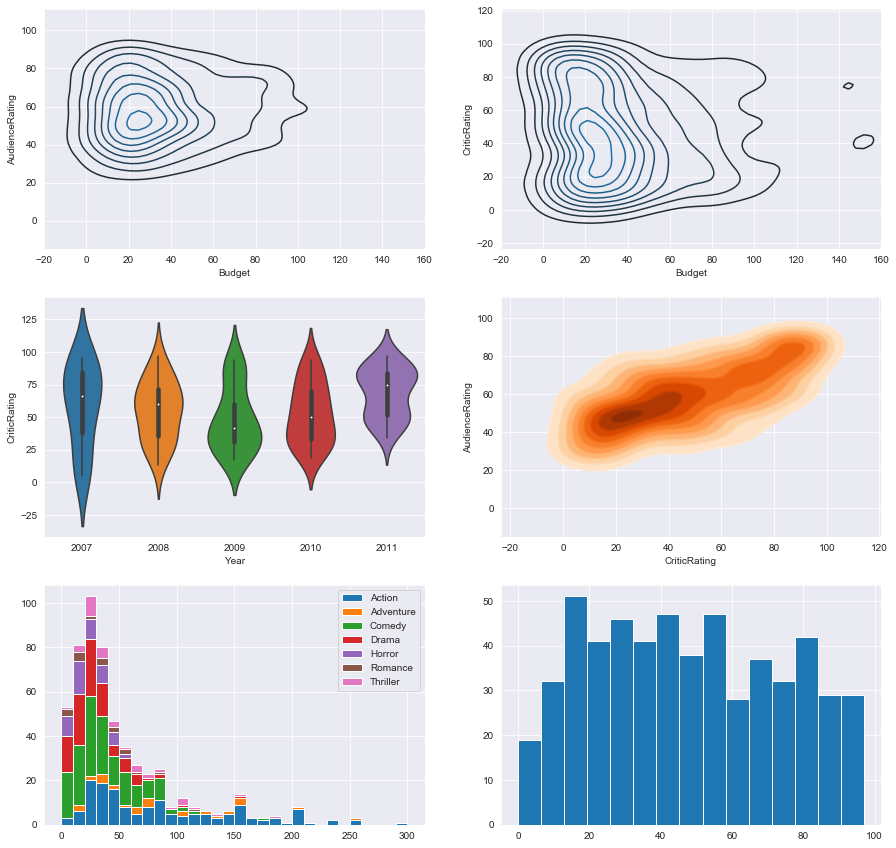

In [54]:
sns.set_style("darkgrid")

f, axes = plt.subplots(3,2, figsize = (15,15))


k1 = sns.kdeplot(movie_rating.Budget,movie_rating.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movie_rating.Budget,movie_rating.CriticRating, ax=axes[0,1])

#ViolinPlot
rz2 = sns.violinplot( data = movie_rating[movie_rating.Genre == 'Drama'], x = 'Year', y = 'CriticRating', ax=axes[1,0])

#KDE Plot
kde1 = sns.kdeplot(movie_rating.CriticRating, movie_rating.AudienceRating , shade = True, 
                   shade_lowest=False,cmap = 'Oranges', ax=axes[1,1] )
##Adds more outline to KDE Plot
kde2 = sns.kdeplot(movie_rating.CriticRating, movie_rating.AudienceRating , 
                   cmap = 'Oranges', ax=axes[1,1])

#plt plot

genre_list = []
mylable = []
for gen in movie_rating.Genre.cat.categories:
    genre_list.append(movie_rating[movie_rating.Genre == gen].Budget)
    mylable.append(gen)
#genre_list
axes[2,0].hist(genre_list, bins=30, stacked = True, rwidth = 1 , label = mylable)
axes[2,0].legend()

axes[2,1].hist(movie_rating.CriticRating, bins= 15)

k1.set(xlim = (-20,160))
k2.set(xlim = (-20,160))

plt.show()

---

In [55]:
#Styling

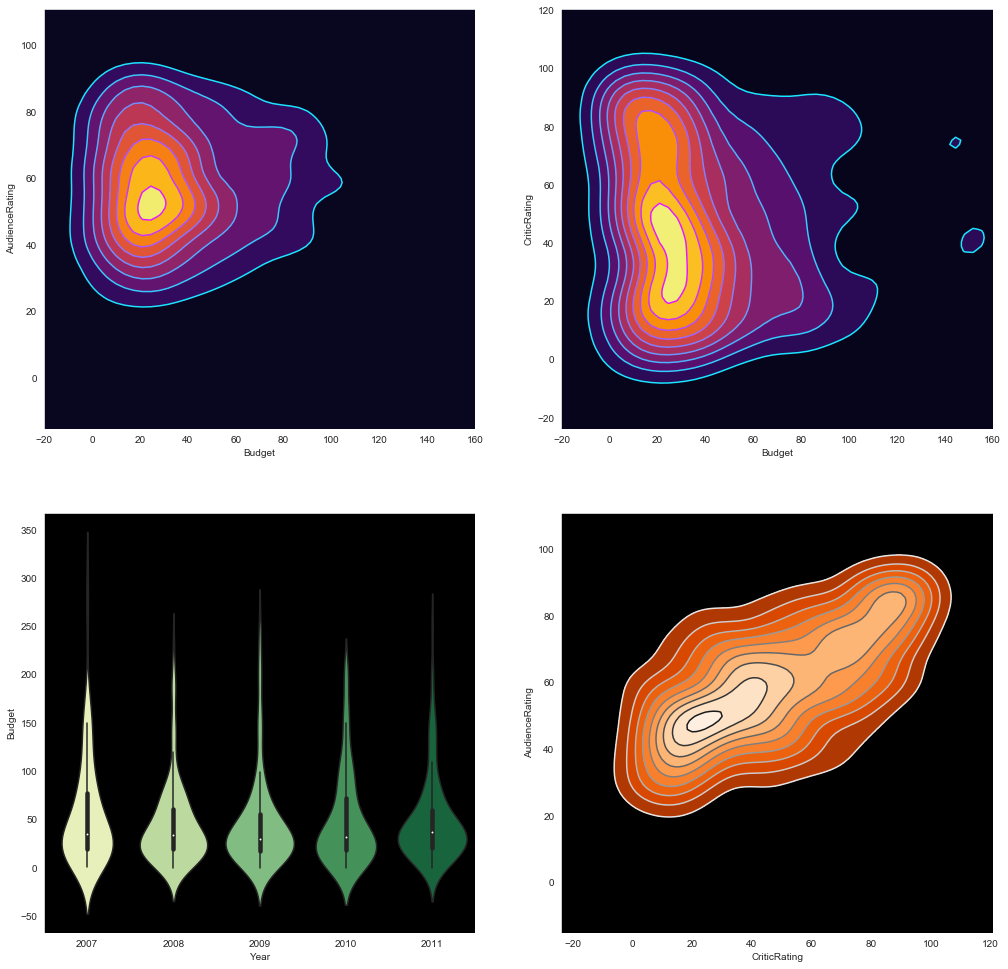

In [87]:
sns.set_style("dark", {"axes.facecolor":"Black"})

f, axes = plt.subplots(2,2, figsize = (17,17))


k1 = sns.kdeplot(movie_rating.Budget,movie_rating.AudienceRating, ax=axes[0,0],
                shade= True, shade_lowest=True, 
                 cmap="inferno")

k1b = sns.kdeplot(movie_rating.Budget,movie_rating.AudienceRating, ax=axes[0,0],
                  cmap="cool")


k2 = sns.kdeplot(movie_rating.Budget,movie_rating.CriticRating, ax=axes[0,1],
                shade= True, shade_lowest=True, 
                 cmap="inferno")

k2b = sns.kdeplot(movie_rating.Budget,movie_rating.CriticRating, ax=axes[0,1],
                  cmap="cool")

#ViolinPlot
rz2 = sns.violinplot( data = movie_rating, x = 'Year', y = 'Budget', ax=axes[1,0],
                    palette = "YlGn")

#KDE Plot
kde1 = sns.kdeplot(movie_rating.CriticRating, movie_rating.AudienceRating , shade = True, 
                   shade_lowest=False,cmap = 'Oranges_r', ax=axes[1,1] )
##Adds more outline to KDE Plot
kde2 = sns.kdeplot(movie_rating.CriticRating, movie_rating.AudienceRating , 
                   cmap = "gist_gray_r", ax=axes[1,1])

#plt plot

# genre_list = []
# mylable = []
# for gen in movie_rating.Genre.cat.categories:
#     genre_list.append(movie_rating[movie_rating.Genre == gen].Budget)
#     mylable.append(gen)
# #genre_list
# axes[2,0].hist(genre_list, bins=30, stacked = True, rwidth = 1 , label = mylable)
# axes[2,0].legend()

# axes[2,1].hist(movie_rating.CriticRating, bins= 15)

k1.set(xlim = (-20,160))
k2.set(xlim = (-20,160))

plt.show()

---

In [88]:
#Theming

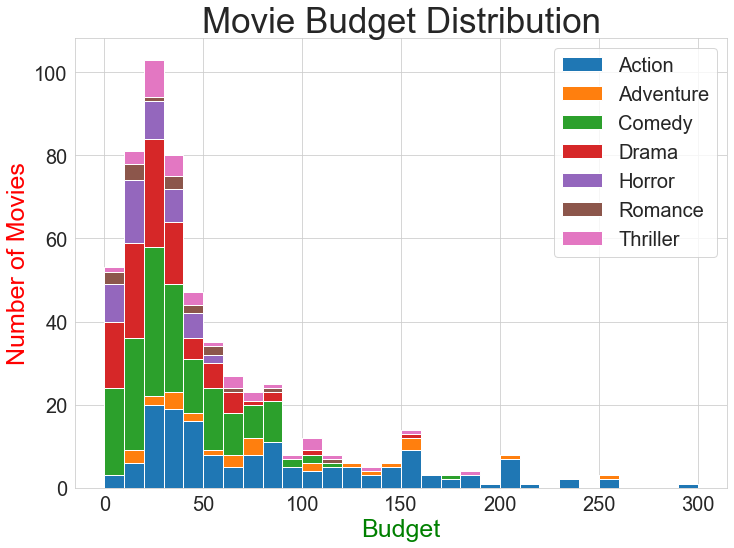

In [97]:
genre_list = []
mylable = []
for gen in movie_rating.Genre.cat.categories:
    genre_list.append(movie_rating[movie_rating.Genre == gen].Budget)
    mylable.append(gen)
#genre_list
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #A4 Size
plt.hist(genre_list, bins=30, stacked = True, rwidth = 1 , label = mylable)
plt.title("Movie Budget Distribution", fontsize=35)
plt.ylabel("Number of Movies", fontsize=25, color = 'Red')
plt.xlabel("Budget", fontsize=25, color = 'Green')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(prop = {'size': 20})
plt.show()